In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as datetime

import pandas_datareader.data as web

from matplotlib.finance import candlestick2_ohlc as cdl


plt.style.use('ggplot')

%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [2]:
# Amazon AMZN
# Facebook FB
# Google GOOGL
# Microsoft MSFT
# Apple AAPL

In [3]:
start = datetime.datetime(2000, 12, 05)
end = datetime.datetime(2016, 12, 04)

In [4]:
fb = web.DataReader('FB', 'yahoo', start, end)
az = web.DataReader('AMZN', 'yahoo', start, end)
gg = web.DataReader('GOOGL', 'yahoo', start, end)
ms = web.DataReader('MSFT', 'yahoo', start, end)
ap = web.DataReader('AAPL', 'yahoo', start, end)

In [8]:
stock_list = [fb,az, gg, ms, ap]

In [9]:
fb.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,38.230000
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,34.029999
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,31.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,32.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,33.029999


In [72]:
fb_week = fb.resample('W', how = 'mean')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


In [74]:
quotes = quotes_historical_yahoo_ohlc('FB', start, end)

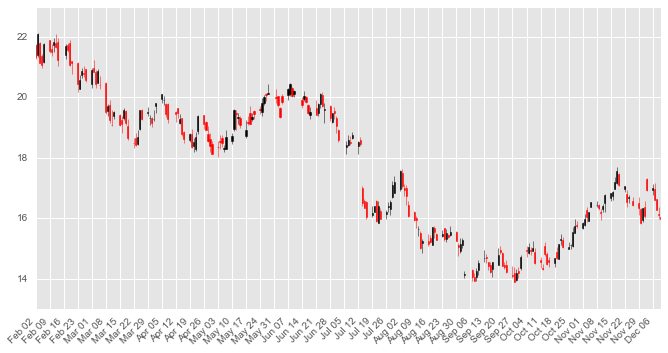

In [87]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc

date1 = (2004, 2, 1)
date2 = (2004, 12, 12)
# (Year, month, day) tuples suffice as args for quotes_historical_yahoo


mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

quotes = quotes_historical_yahoo_ohlc('INTC', date1, date2)
if len(quotes) == 0:
    raise SystemExit

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)

#plot_day_summary(ax, quotes, ticksize=3)
candlestick_ohlc(ax, quotes, width=0.6)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [79]:
candlestick_ohlc(ax, fb_week.values, width=0.6);

In [51]:
# Function to plot closing prices for all stocks in list

def plot_trend(df, price):

    # Add linear trend
    line_coef = np.polyfit(np.arange(0, len(df)), df[price], 1)
    polynomial = np.poly1d(line_coef)
    
    # Plotting both linear trend and daily prices
    plt.plot(df.index, df[price], df.index, polynomial(np.arange(0, len(df))))
    

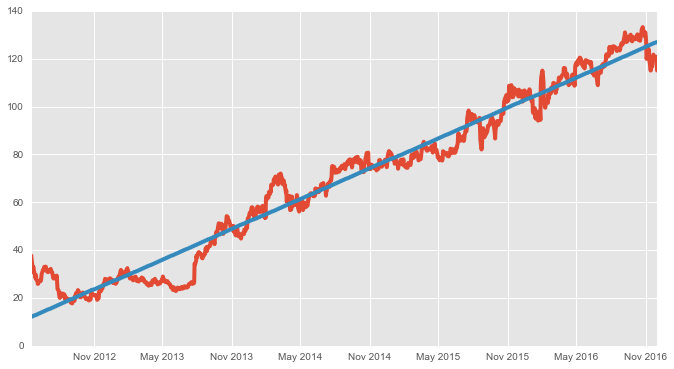

In [60]:
plot_trend(fb, 'Close')

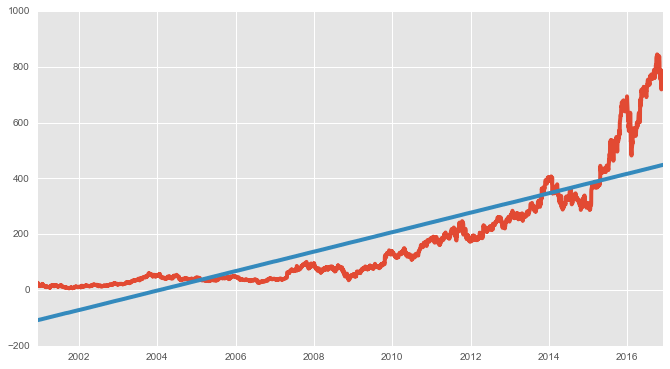

In [61]:
plot_trend(az, 'Close')

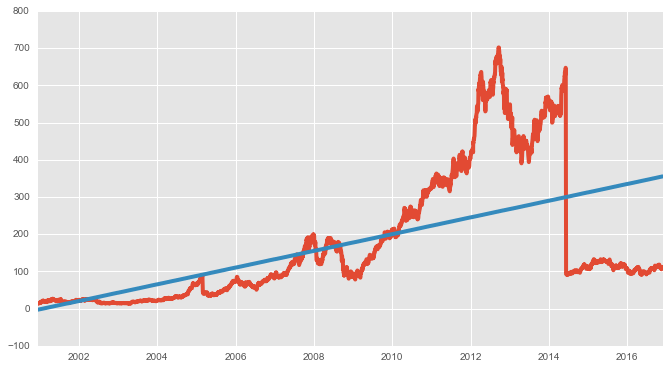

In [62]:
plot_trend(ap, "Close")

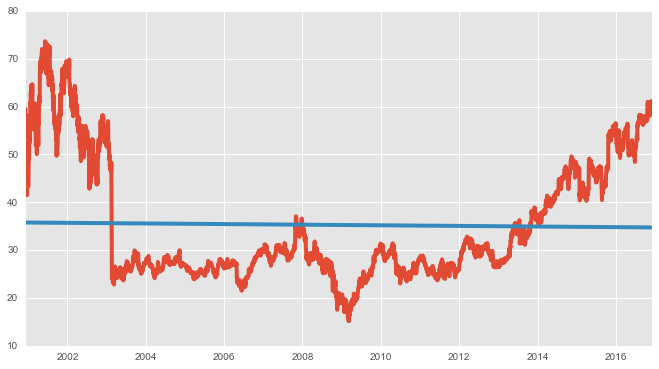

In [63]:
plot_trend(ms, 'Close')

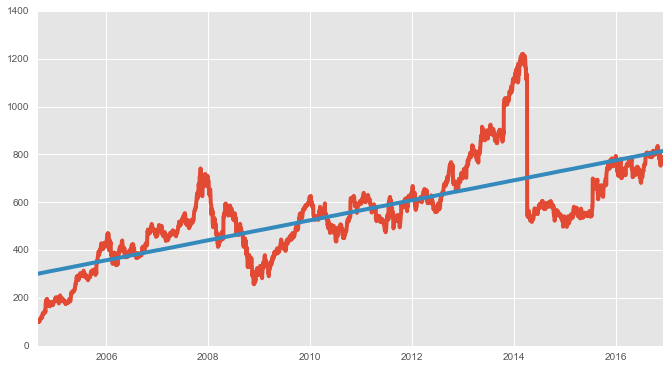

In [64]:
plot_trend(gg, 'Close')